## Hierarchical Clustering

- dendrogram으로 시각화 가능

- Agglomerative clustering
    - 데이터 포인트들을 개별 군집으로 여기고 시작
    - 모든 데이터포인트들이 하나의 군집 안에 속할 때까지(혹은 k개의 군집) 반복

- Divisive clustering
    - 하나의 거대한 군집에서 분할하면서 진행

### Agglomerative Clustering

- 데이터 포인트 수 n개만큼의 군집 존재
- 특정 조건을 만족하기 전까지 두 개의 가장 가까운 군집을 병합

- Dendrogram으로 군집화 결과를 보면서 군집 수를 정할 수 있음


### Linkage

어떤 식으로 두 군집 사이의 거리를 정할 것인가  

- Single(minimum): 최소 거리
    - 복잡한 형태여도 계산 가능. 하지만 이상치에 약함

- Complete(maximum): 최대 거리
    - 이상치와 노이즈에는 강하지만, 구형태(globular)의 군집에게는 bias가 있음.

- Average: 평균 거리
    - Single과 Complete의 속성 모두 가지고 있음. 

- Ward: 두 군집을 합쳤을 때 분산이 가장 작게 증가하는 방향
    - 일반적으로 많이 사용함

### 실습

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering


# kmeans와 다르게 새 데이터를 적용하지 못함
X_train, _ = make_blobs(random_state=1)
print('X_train.shape:', X_train.shape)

X_train.shape: (100, 2)


In [2]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_train)

,n_clusters,3
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [3]:
assignments_X_train = agg.labels_
print(assignments_X_train)

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [7]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score


iris = load_iris()
X_train, y_train= iris.data, iris.target
print('X_train.shape:', X_train.shape)

X_train.shape: (150, 4)


In [8]:
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)   # 거리 기반임으로 scaling을 하는 것이 좋음

In [9]:
clustering_ari= []
linkage_settings= ['ward', 'average', 'single', 'complete']

for linkage in linkage_settings:
    agg= AgglomerativeClustering(n_clusters=3, linkage=linkage)    
    agg.fit(X_train_scaled)

    assignments_X_train= agg.labels_    
    clustering_ari.append(adjusted_rand_score(y_train, assignments_X_train))

In [10]:
import pandas as pd


df = pd.DataFrame({"linkage": linkage_settings, "ARI": clustering_ari})
df

,linkage,ARI
0,ward,0.615323
1,average,0.562136
2,single,0.558371
3,complete,0.572631


In [11]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx- n_samples]
                counts[i] = current_count
    
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

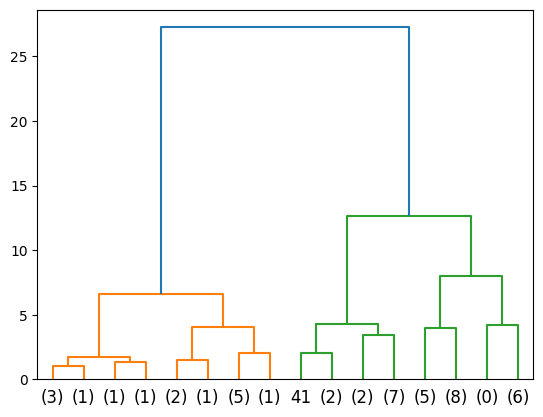

In [14]:
agg = AgglomerativeClustering(n_clusters=1, compute_distances=True)
agg.fit(X_train_scaled)

plot_dendrogram(agg, truncate_mode="level", p=3)